<a href="https://colab.research.google.com/github/jithma10320/Obesity_Prediction/blob/main/Obesity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obesity Prediction

Import Libraries

In [70]:
import numpy as np
import pandas as pd

import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [102]:
df = pd.read_csv("/content/drive/MyDrive/Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

0. **Gender**: Refers to the biological sex of the individual, typically male or female. Gender can affect body fat distribution, metabolism, and health risks related to obesity.

1. **Age**: The individual’s age. Age can influence metabolism and the likelihood of developing obesity. Older individuals may experience slower metabolism, leading to weight gain or difficulty losing weight.

2. **Height**: The individual’s height. Height is used to calculate the Body Mass Index (BMI), a common method of determining whether someone is underweight, normal weight, overweight, or obese.

3. **Weight**: The individual’s body weight. Like height, weight is essential for calculating BMI, which is a key indicator of obesity.

4. **Family History**: Refers to whether there is a history of obesity or other weight-related issues in the individual’s family. Genetics can play a role in an individual’s tendency to gain weight or develop obesity.

5. **FAVC (Frequent Consumption of High Caloric Food)**: Refers to how often the individual consumes high-calorie foods. Frequent consumption of unhealthy, calorie-dense foods can contribute to obesity.

6. **FCVC (Frequency of Consumption of Vegetables and Fruits)**: The frequency at which the individual eats fruits and vegetables. A lower consumption of these healthy foods may increase the risk of obesity.

7. **NCP (Number of Physical Activities per Week)**: Refers to how many times a person engages in physical activity (like exercise) per week. Regular physical activity helps maintain a healthy weight, and a lack of it can contribute to obesity.

8. **CAEC (Consumption of Alcoholic Drinks)**: The amount of alcohol consumed. Alcoholic drinks can be high in calories, and excessive drinking can contribute to weight gain and obesity.

9. **SMOKE**: Whether the individual smokes or not. Smoking is often associated with changes in metabolism and appetite, and while smokers tend to have lower body weight in some cases, quitting smoking can lead to weight gain.

10. **CH2O (Consumption of Water)**: The amount of water the individual drinks daily. Proper hydration is essential for metabolism and overall health. Dehydration or low water intake might influence appetite and metabolic processes, potentially contributing to obesity.

11. **SCC (Sleep Consumption Count)**: Refers to how many hours of sleep the individual gets. Insufficient sleep can lead to weight gain by disrupting hormones that regulate hunger and metabolism.

12. **FAF (Physical Activity Frequency)**: The frequency of engaging in physical activity, such as exercise, sports, or active hobbies. Increased physical activity helps maintain a healthy weight and reduces the risk of obesity.

13. **TUE (Time Using Electronic Devices)**: The amount of time spent on electronic devices (e.g., computers, smartphones, television). Excessive screen time can lead to a sedentary lifestyle, which increases the risk of obesity.

14. **CALC (Caloric Intake)**: The total number of calories consumed daily. A higher caloric intake, especially without corresponding physical activity, can lead to weight gain and obesity.

15. **MTRANS (Mode of Transportation)**: Refers to how the individual typically travels (e.g., walking, cycling, driving, public transport). Active modes of transportation (e.g., walking, cycling) help prevent obesity, while sedentary transport (e.g., driving) can contribute to weight gain.

16. **Obesity**: The target variable, representing whether an individual is classified as obese or not. It is typically determined using BMI, and obesity is associated with various health risks such as heart disease, diabetes, and hypertension.

In [73]:
df.shape

(2111, 17)

In [74]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [75]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


PreProcessing

In [76]:
# I think SCC column doesn't explain the obesity

df.drop('SCC', axis=1, inplace = True)

In [77]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# identify categorical columns
categorical_columns = ['CALC', 'MTRANS', "CAEC"]

# convert categorical columns to meaningful values
label_encoder = LabelEncoder()
for x in categorical_columns:
    df[x] = label_encoder.fit_transform(df[x])

print("Label Encoded DataFrame:")
print(df.head(15))

Label Encoded DataFrame:
    Gender   Age  Height  Weight family_history FAVC  FCVC  NCP  CAEC SMOKE  \
0   Female  21.0    1.62    64.0            yes   no   2.0  3.0     2    no   
1   Female  21.0    1.52    56.0            yes   no   3.0  3.0     2   yes   
2     Male  23.0    1.80    77.0            yes   no   2.0  3.0     2    no   
3     Male  27.0    1.80    87.0             no   no   3.0  3.0     2    no   
4     Male  22.0    1.78    89.8             no   no   2.0  1.0     2    no   
5     Male  29.0    1.62    53.0             no  yes   2.0  3.0     2    no   
6   Female  23.0    1.50    55.0            yes  yes   3.0  3.0     2    no   
7     Male  22.0    1.64    53.0             no   no   2.0  3.0     2    no   
8     Male  24.0    1.78    64.0            yes  yes   3.0  3.0     2    no   
9     Male  22.0    1.72    68.0            yes  yes   2.0  3.0     2    no   
10    Male  26.0    1.85   105.0            yes  yes   3.0  3.0     1    no   
11  Female  21.0    1.72   

In [78]:
# Manual Columns setting 0 - 1

gender_mapping = {'Male': 0, 'Female': 1}
family_history_mapping = {'yes': 1, 'no': 0}
smoke_mapping = {'yes': 1, 'no': 0}
favc_mapping = {'yes': 1, 'no': 0}


df['Gender'] = df['Gender'].map(gender_mapping)
df['family_history'] = df['family_history'].map(family_history_mapping)
df['SMOKE'] = df['SMOKE'].map(smoke_mapping)
df["FAVC"] = df["FAVC"].map(favc_mapping)

print(df.head())

   Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       1  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       1  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       0  23.0    1.80    77.0               1     0   2.0  3.0     2      0   
3       0  27.0    1.80    87.0               0     0   3.0  3.0     2      0   
4       0  22.0    1.78    89.8               0     0   2.0  1.0     2      0   

   CH2O  FAF  TUE  CALC  MTRANS              Obesity  
0   2.0  0.0  1.0     3       3        Normal_Weight  
1   3.0  3.0  0.0     2       3        Normal_Weight  
2   2.0  2.0  1.0     1       3        Normal_Weight  
3   2.0  2.0  0.0     1       4   Overweight_Level_I  
4   2.0  0.0  0.0     2       3  Overweight_Level_II  


In [79]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0.0,1.0,3,3,Normal_Weight
1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,3.0,0.0,2,3,Normal_Weight
2,0,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,2.0,1.0,1,3,Normal_Weight
3,0,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,2.0,0.0,1,4,Overweight_Level_I
4,0,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0.0,0.0,2,3,Overweight_Level_II


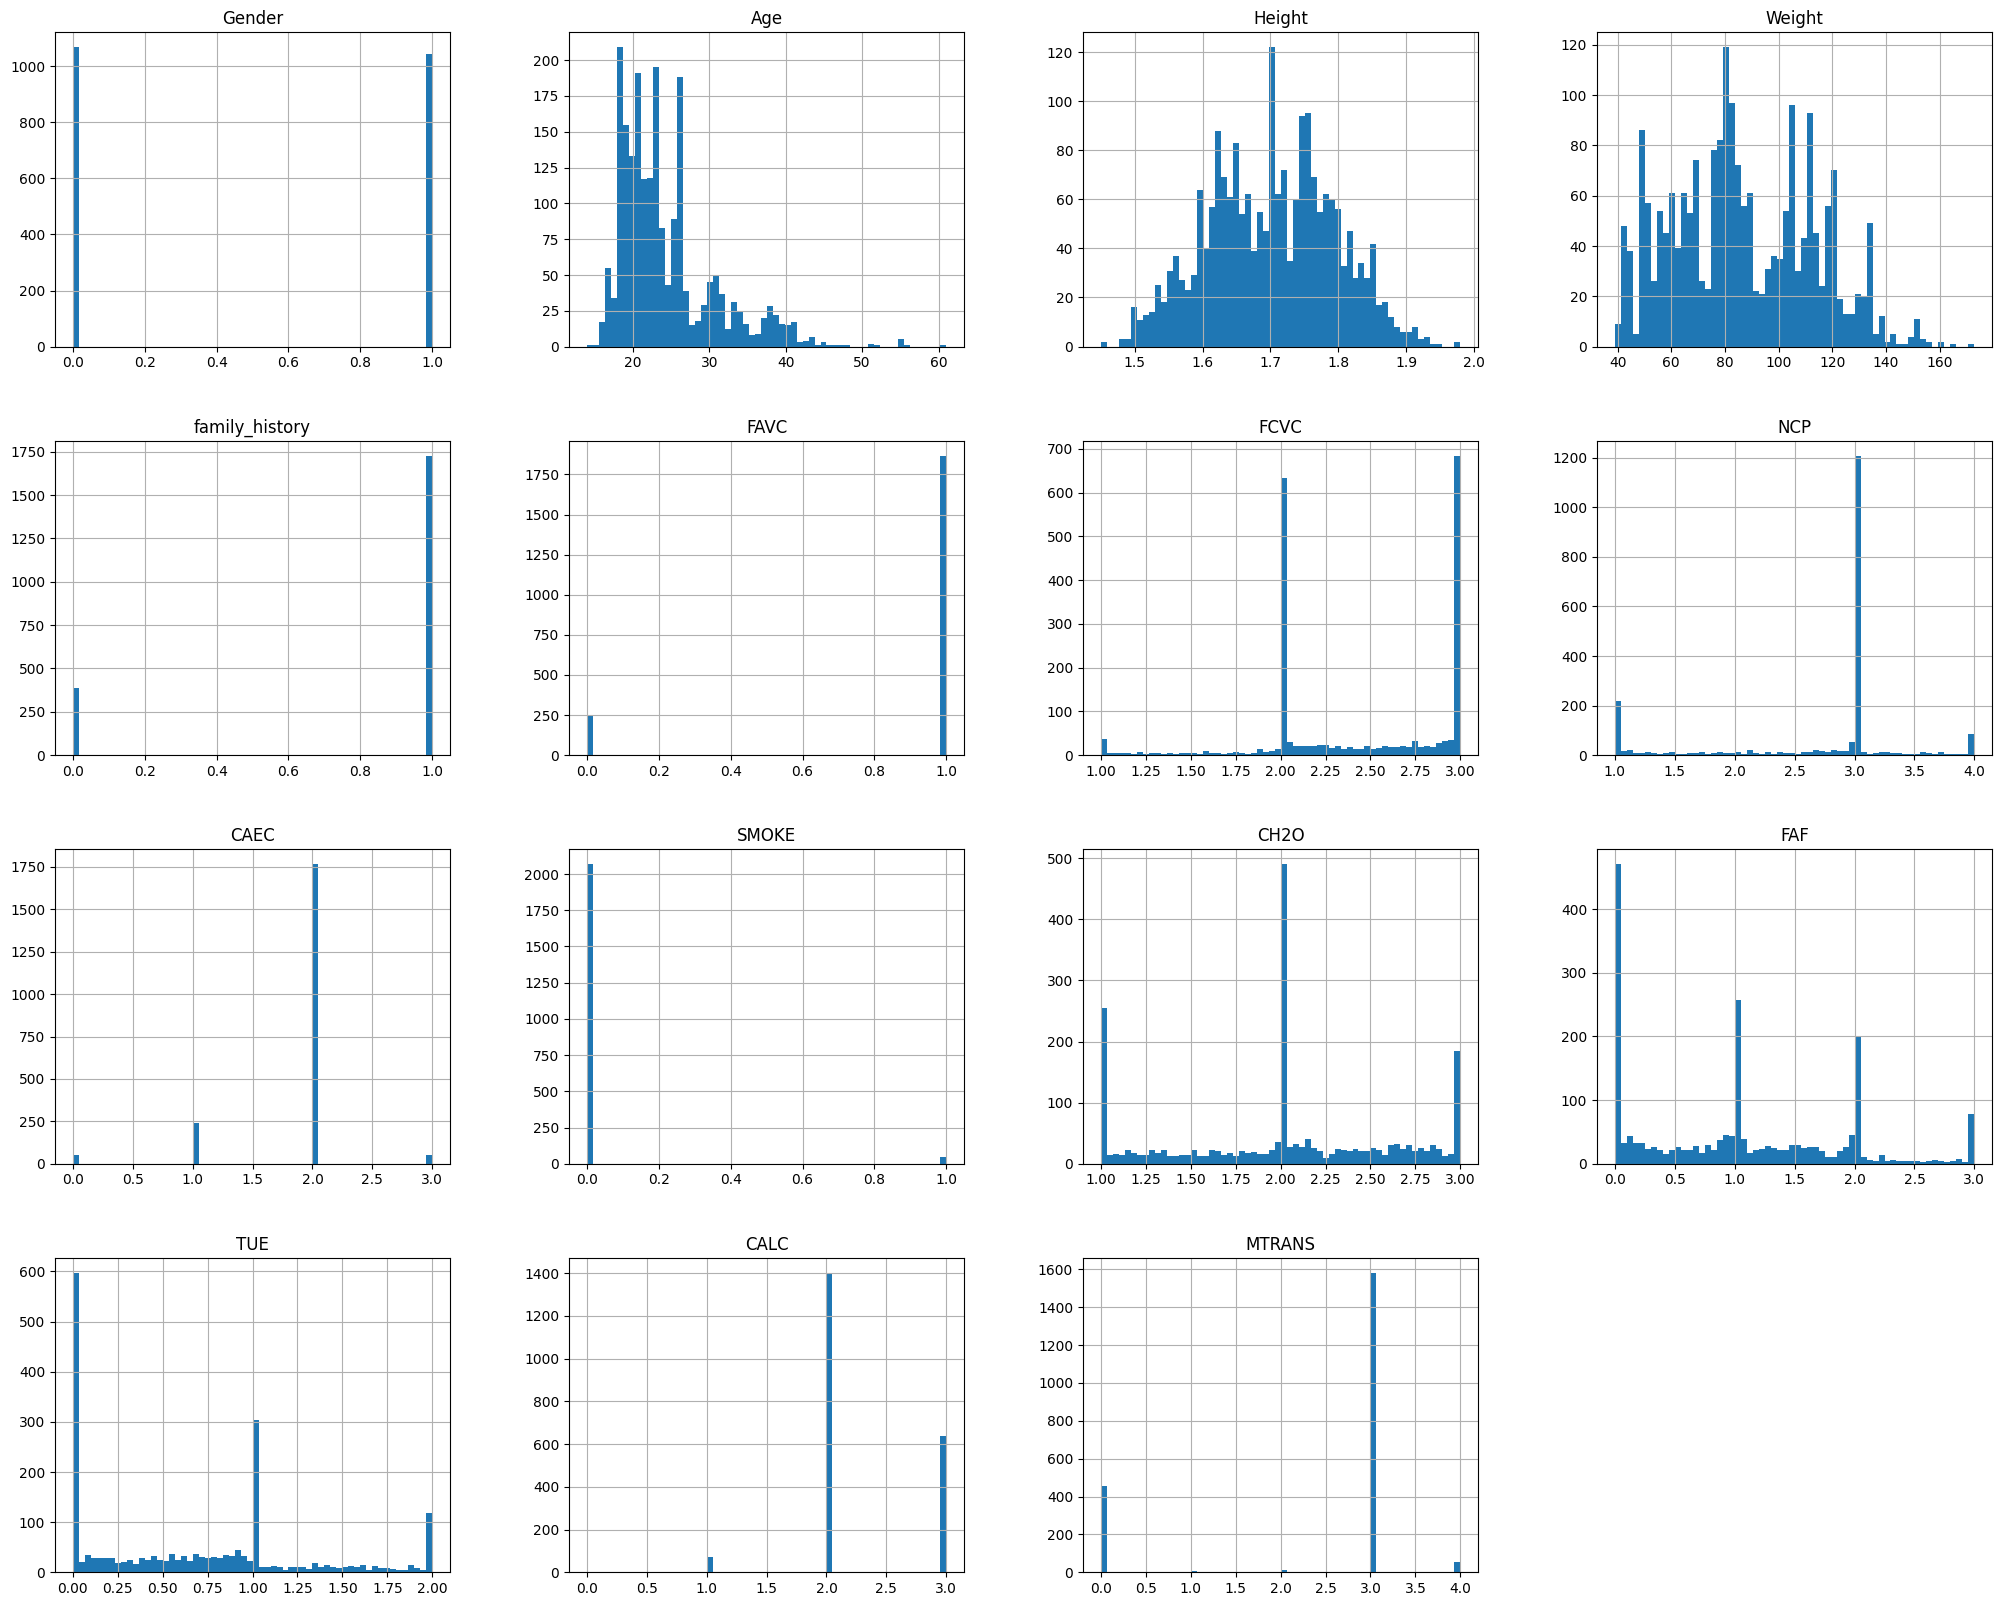

In [80]:
# Looking at the histograms of numerical data

df.hist(figsize = (25,20), bins = 60)
plt.show()

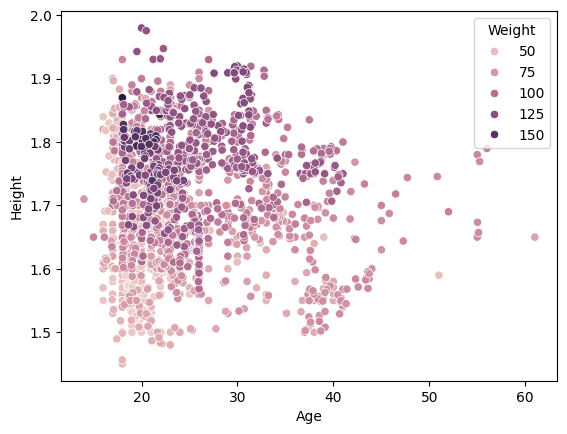

In [81]:
sns.scatterplot(x='Age', y='Height', hue='Weight', data=df)
plt.show()

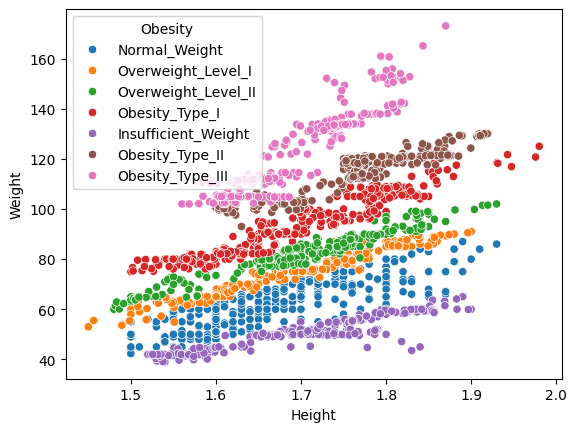

In [82]:
sns.scatterplot(x='Height', y='Weight', hue='Obesity', data=df)
plt.show()

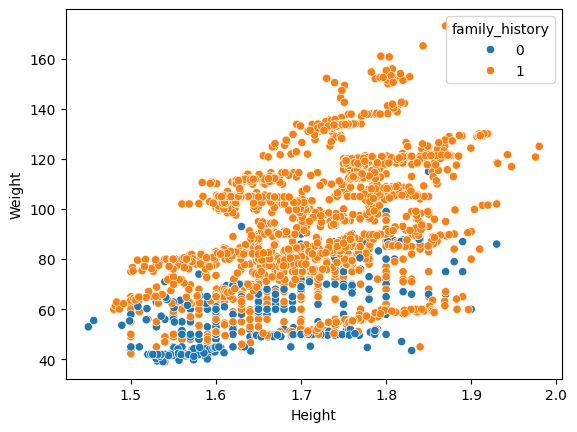

In [83]:
sns.scatterplot(x='Height', y='Weight', hue='family_history', data=df)
plt.show()

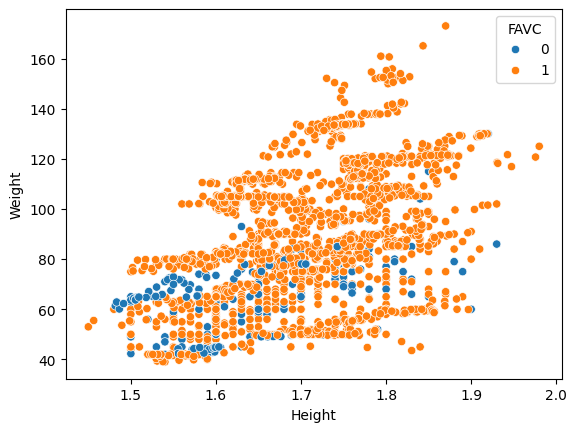

In [84]:
sns.scatterplot(x='Height', y='Weight', hue='FAVC', data=df)
plt.show()

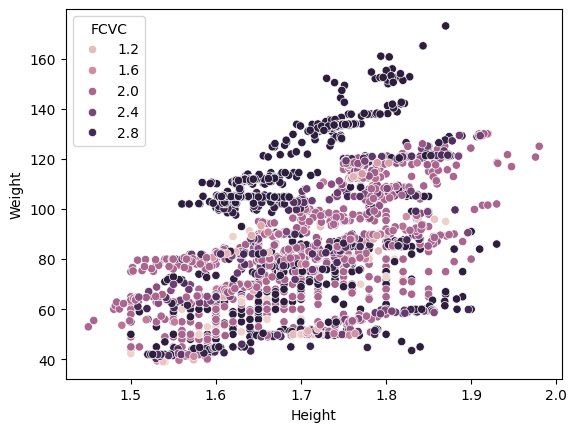

In [85]:
sns.scatterplot(x='Height', y='Weight', hue='FCVC', data=df)
plt.show()

# Modeling

Now, let's see what we can do with our models.For this part I decided to use a few different models:



* Logistic Regression
* Random Forest Classifier
* Decision Tree







# Logistic Regression

In [86]:
df_log_reg = df.copy()

print(df_log_reg['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features (X): All columns except Obesity
X_lr = df_log_reg.drop('Obesity', axis=1)

# Target (y): Obesity column
y_lr = df_log_reg['Obesity']

print("Features (X) shape:", X_lr.shape)
print("Target (y) shape:", y_lr.shape)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Creating and fitting the Logistic Regression model
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

# Optional: Evaluate the model performance
print(f"Training accuracy: {lr_clf.score(X_train, y_train)}")
print(f"Testing accuracy: {lr_clf.score(X_test, y_test)}")


Features (X) shape: (2111, 15)
Target (y) shape: (2111,)
Training accuracy: 0.8293838862559242
Testing accuracy: 0.7966903073286052


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.metrics import classification_report

# CLASSIFICATION REPORT
y_pred_lr = lr_clf.predict(X_test)
report = classification_report(y_test, y_pred_lr)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.98      0.90        56
      Normal_Weight       0.76      0.52      0.62        62
     Obesity_Type_I       0.90      0.79      0.84        78
    Obesity_Type_II       0.83      1.00      0.91        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.62      0.62      0.62        56
Overweight_Level_II       0.60      0.64      0.62        50

           accuracy                           0.80       423
          macro avg       0.78      0.79      0.78       423
       weighted avg       0.80      0.80      0.79       423



In [89]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_lr)
print(accuracy)

0.7966903073286052


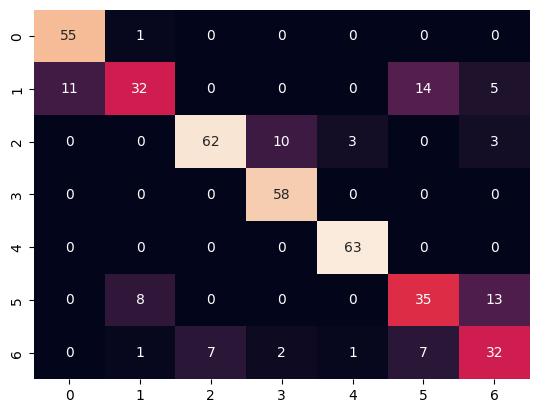

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

# Random Forest

In [91]:
df_random_forest = df.copy()

print(df_random_forest['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Features (X): All columns except Obesity
X_rf = df_random_forest.drop('Obesity', axis=1)

# Target (y): Obesity column
y_rf = df_random_forest['Obesity']

print("Features (X) shape:", X_rf.shape)
print("Target (y) shape:", y_rf.shape)

Features (X) shape: (2111, 15)
Target (y) shape: (2111,)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)

rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10)

In [94]:
y_pred_rfc = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred_rfc)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.87      0.94      0.90        62
     Obesity_Type_I       0.99      0.96      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.92      0.86      0.89        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



In [95]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_rfc)
print(accuracy)

0.9527186761229315


# Decision Tree

In [96]:
df_decision_tree = df.copy()

print(df_decision_tree['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [97]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Features (X): All columns except Obesity
X_rf = df_random_forest.drop('Obesity', axis=1)

# Target (y): Obesity column
y_rf = df_random_forest['Obesity']

print("Features (X) shape:", X_rf.shape)
print("Target (y) shape:", y_rf.shape)

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

Features (X) shape: (2111, 15)
Target (y) shape: (2111,)


DecisionTreeClassifier()

In [98]:
y_pred_dtc = dt_clf.predict(X_test)
report = classification_report(y_test, y_pred_dtc)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.98      0.94        56
      Normal_Weight       0.92      0.87      0.89        62
     Obesity_Type_I       0.97      0.92      0.95        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.93      0.92        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



In [99]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred_dtc)
print(accuracy)

0.9432624113475178


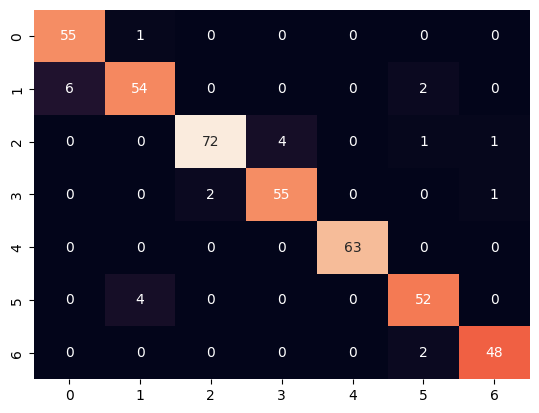

In [101]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

#Conclusion